## Group 6 - Data Science Salary Data Analysis
Ryan VanDermellen, Ezra Crocker, Tom Lewis, Nick Whited, Erica Helton
### Data Set - https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries?resource=download
---

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [34]:
# Load the data from the CSV file
df = pd.read_csv('ds_salaries.csv')

# Display the first few rows and summary information about the dataset
data_info = df.info()
data_head = df.head()

data_info, data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


(None,
    Unnamed: 0  work_year experience_level employment_type  \
 0           0       2020               MI              FT   
 1           1       2020               SE              FT   
 2           2       2020               SE              FT   
 3           3       2020               MI              FT   
 4           4       2020               SE              FT   
 
                     job_title  salary salary_currency  salary_in_usd  \
 0              Data Scientist   70000             EUR          79833   
 1  Machine Learning Scientist  260000             USD         260000   
 2           Big Data Engineer   85000             GBP         109024   
 3        Product Data Analyst   20000             USD          20000   
 4   Machine Learning Engineer  150000             USD         150000   
 
   employee_residence  remote_ratio company_location company_size  
 0                 DE             0               DE            L  
 1                 JP             0        

<p>
From the table above, there are a total of 607 entries and 12 columns. No columns contain null values, as all data is present in every column. However, some columns, such as Unnamed: 0, do not appear essential for the analysis, serving only as an index. Columns like work_year, experience_level, job_title, and salary_in_usd seem crucial for understanding salary trends and variations based on experience level and job title.

Next we will look at the descriptive statistics.
</p>

In [37]:
df.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


<p>
As the table shows, there are potential outliers in the salary and salary_in_usd data. The maximum salary (30.4 million in local currency) and maximum salary in USD (600,000) are significantly higher than the averages (324,000 in local currency and about 112,000 in USD). Despite these values, it’s reasonable to retain them, as salaries vary widely based on location, experience level, company, and job title.

The remote_ratio column shows values ranging from 0% to 100%, with the median at 100%, indicating that half of the data scientists work entirely remotely.
</p>

### **Cleaning Decision Summary**
- **The "Unnamed: 0" column**: which served as an index, is redundant. It will be dropped to streamline the dataset.
- **Standardize Categorical Columns**: Make sure categorical columns like experience_level, employment_type, and company_size are consistent (e.g., convert to lowercase)
- **Convert Numeric Columns**: Confirm that numeric columns such as salary, salary_in_usd, and remote_ratio are properly formatted and contain only numeric data.
---
#### **Data Cleaning**
First, according to the cleaning decision, the "Unnamed: 0" column will be dropped.

In [38]:
# Remove unnecessary index column
df_cleaned = df.drop(columns=['Unnamed: 0'])

In [39]:
# Check to see if the column was dropped
df_cleaned.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [40]:
# Standardize categorical columns to lowercase
categorical_columns = ['experience_level', 'employment_type', 'job_title', 'employee_residence', 'company_location', 'company_size']
df_cleaned[categorical_columns] = df_cleaned[categorical_columns].apply(lambda col: col.str.lower())

In [41]:
# Verify data types and convert if necessary
numeric_columns = ['salary', 'salary_in_usd', 'remote_ratio']
df_cleaned[numeric_columns] = df_cleaned[numeric_columns].apply(pd.to_numeric)

In [42]:
# Check the updated data structure
df_cleaned_info = df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


### **Cleaning Result Summary**
From the table below, we can see that the data in each column is clean without any null values. The goal was to maintain data integrity while refining the dataset. The removal of the unnecessary index column and standardization of categorical columns ensures consistency and clarity. The data now contains 607 entries and 11 columns, providing a more streamlined foundation for analysis.

In [43]:
# Show a preview of the cleaned dataset
df_cleaned_head = df_cleaned.head()

df_cleaned_info, df_cleaned_head

(None,
    work_year experience_level employment_type                   job_title  \
 0       2020               mi              ft              data scientist   
 1       2020               se              ft  machine learning scientist   
 2       2020               se              ft           big data engineer   
 3       2020               mi              ft        product data analyst   
 4       2020               se              ft   machine learning engineer   
 
    salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
 0   70000             EUR          79833                 de             0   
 1  260000             USD         260000                 jp             0   
 2   85000             GBP         109024                 gb            50   
 3   20000             USD          20000                 hn             0   
 4  150000             USD         150000                 us            50   
 
   company_location company_size  
 0               d

--- 
### **Exploratory Data Analysis**
Research Part 1: General Exploration
- Question 1: How have data science salaries changed over the years?
- Question 2: What is the distribution of salaries across different job titles?
- Question 3: How does the level of experience impact salary?

Research Part 2: Attributes Associated with Successful Data Science Careers
- Question 1: Which job titles are associated with high-paying data science roles?
- Question 2: How does company size affect the average salary of data scientists?
- Question 3: What is the correlation between remote work ratios and salary levels?

Research Part 3: Trends in Data Science Salaries by Location
- Question 1: Which countries offer the highest average salaries for data science roles?
- Question 2: What are the emerging trends in salaries and remote work across different regions?
- Question 3: How do company locations and employee residences impact salary?

---

## Research Part 1: General Exploration
### Question 1: How have data science salaries changed over the years?

**Explanation:**
To understand how data science salaries have evolved over the years, we'll analyze the salary data across different years (work_year column). This analysis will focus on the salary_in_usd column, as it's standardized across currencies, making it easier to compare salaries globally. We will summarize the data for each year to identify trends or significant changes in compensation.

In [44]:
# Group data by work year and calculate summary statistics for each year
salary_trends = df_cleaned.groupby('work_year')['salary_in_usd'].agg(['mean', 'min', 'max']).reset_index()

# Preview the results
salary_trends

,work_year,mean,min,max
0,2020,95813.000000,5707,450000
1,2021,99853.792627,2859,600000
2,2022,124522.006289,10000,405000


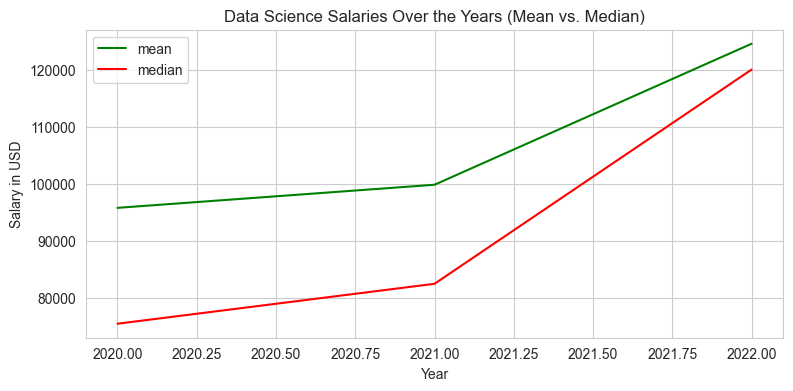

In [48]:
import seaborn as sns

# Set the style for the plot
sns.set_style('whitegrid')

# Set x and y data for mean and median salary trends
x = salary_trends['work_year']
y_mean = salary_trends['mean']

# Calculate the median salary per year
y_median = df_cleaned.groupby('work_year')['salary_in_usd'].median()

# Set plot size
plt.figure(figsize=(9, 4))

# Plot the line charts for mean and median salaries
plt.plot(x, y_mean, color='g', label='mean')
plt.plot(x, y_median, color='r', label='median')

# Set title and labels
plt.title('Data Science Salaries Over the Years (Mean vs. Median)')
plt.xlabel('Year')
plt.ylabel('Salary in USD')

# Set legend location
plt.legend(loc='upper left')

plt.show()

This chart displays the trends in data science salaries over the years, showing both the mean (green) and median (red) salary values. It highlights that while the mean salaries have steadily increased from 2020 to 2022, the median salaries also follow a similar upward trend, though less dramatically.

The difference between the mean and median values in 2022 indicates some higher-paying roles that skew the mean upward.

---

## Research Part 1: General Exploration
### Question 2: What is the distribution of salaries across different job titles?
**Explanation:**
To understand how salaries vary among different job titles, we will:

Group the dataset by job_title.
Calculate the average, minimum, and maximum salaries for each job title.
Visualize the distribution of mean salaries across different job titles.

In [50]:
# Group data by job title and calculate summary statistics for salaries
job_title_stats = df_cleaned.groupby('job_title')['salary_in_usd'].agg(['mean', 'min', 'max']).reset_index()

# Sort by mean salary for better visualization
job_title_stats_sorted = job_title_stats.sort_values(by='mean', ascending=False)

# Preview the result
job_title_stats_sorted.head()

,job_title,mean,min,max
14,data analytics lead,405000.000000,405000,405000
45,principal data engineer,328333.333333,185000,600000
28,financial data analyst,275000.000000,100000,450000
46,principal data scientist,215242.428571,148261,416000
25,director of data science,195074.000000,130026,325000


The table above shows the average (mean), minimum (min), and maximum (max) salaries for each job title. The job titles are sorted by their average salaries in descending order.

To provide a clearer view of salary distributions across job titles, we'll plot a bar graph focusing only on the mean salaries.

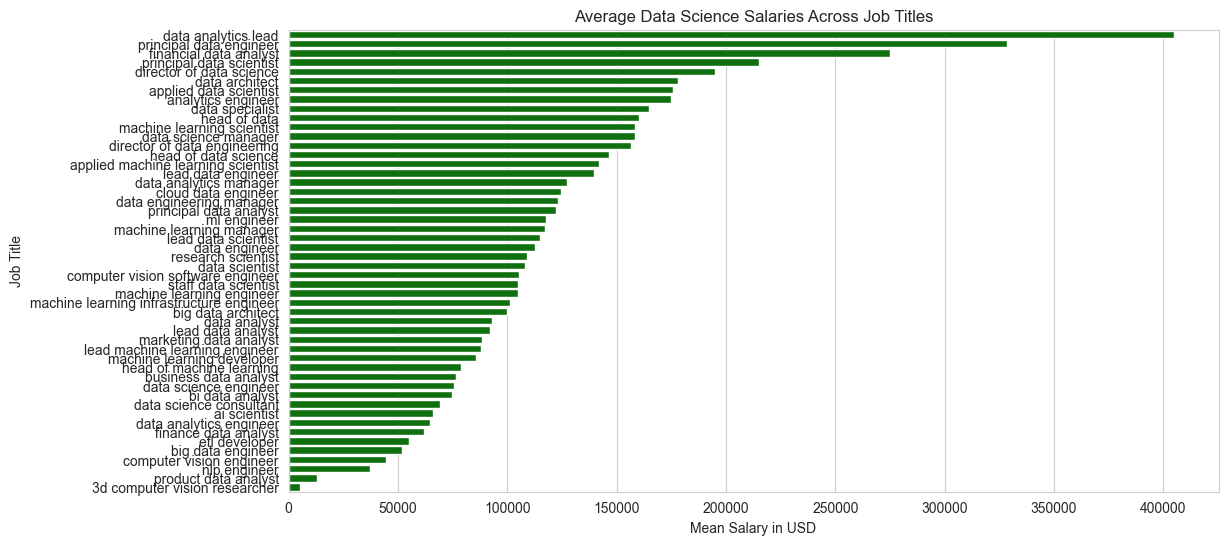

In [51]:
# Set plot size
plt.figure(figsize=(12, 6))

# Plot bar chart for mean salaries across job titles
sns.barplot(x='mean', y='job_title', data=job_title_stats_sorted, color='g')

# Set title and labels
plt.title('Average Data Science Salaries Across Job Titles')
plt.xlabel('Mean Salary in USD')
plt.ylabel('Job Title')

plt.show()

This bar chart displays the average salaries for various data science job titles. Higher-paying roles like Data Analytics Lead, Principal Data Engineer, and Financial Data Analyst stand out at the top, while roles like 3D Computer Vision Researcher and Product Data Analyst have relatively lower averages.

---

## Research Part 1: 
### Question 3 - How does the level of experience impact salary?
Exploring the effect of experience levels on salaries is crucial in understanding the career growth trajectory in data science. By assessing how compensation varies across entry, mid-level, senior, and executive roles, this analysis provides insights into expected salary progression over time.

**Explanation:**
To analyze the relationship between experience level and salary we will:

- Group the data by experience_level.
- Calculate the average, minimum, and maximum salaries for each level.
- Visualize the salary distribution using a bar plot.

In [52]:
# Group data by experience level and calculate summary statistics for salaries
experience_stats = df_cleaned.groupby('experience_level')['salary_in_usd'].agg(['mean', 'min', 'max']).reset_index()

# Sort by mean salary for better visualization
experience_stats_sorted = experience_stats.sort_values(by='mean', ascending=False)

# Preview the result
experience_stats_sorted

,experience_level,mean,min,max
1,ex,199392.038462,69741,600000
3,se,138617.292857,18907,412000
2,mi,87996.056338,2859,450000
0,en,61643.318182,4000,250000


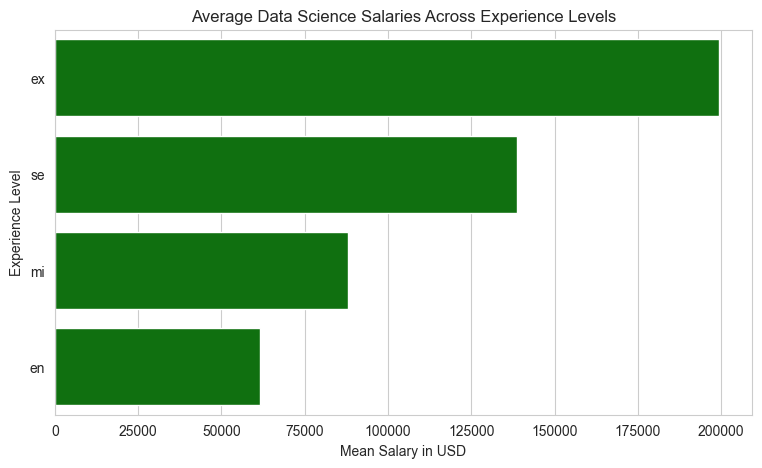

In [53]:
# Set plot size
plt.figure(figsize=(9, 5))

# Plot bar chart for mean salaries across experience levels
sns.barplot(x='mean', y='experience_level', data=experience_stats_sorted, color='g')

# Set title and labels
plt.title('Average Data Science Salaries Across Experience Levels')
plt.xlabel('Mean Salary in USD')
plt.ylabel('Experience Level')

plt.show()

This bar chart illustrates how the average salaries vary by experience level. Those in executive or director roles (EX) earn the most, followed by senior (SE), mid-level (MI), and entry-level (EN) positions. This trend confirms the expectation that more experience generally leads to higher salaries in data science.


## **Part 1 Question Summary**
- Question 1: Data science salaries have shown a consistent upward trend from 2020 to 2022. The growing demand for specialized skills and an expanding job market may explain this increase. With these trends in mind, future analyses should monitor specific skill demand and salary forecasts.

- Question 2: Salary distribution varies significantly across job titles. Roles like Data Analytics Lead and Principal Data Engineer command high salaries due to their specialized nature, leadership responsibilities, and high impact. Further exploration could analyze which skills and responsibilities distinguish these high-paying roles.

- Question 3: The level of experience has a notable impact on salary, with executive and senior roles commanding the highest averages. This reinforces the importance of gaining relevant skills and experience to advance in data science careers. More research is needed to identify key career paths that lead to these high-paying executive positions.

---

## **Part 2: Question 1 - Which job titles are associated with high-paying data science roles?**
**Explanation:**
To identify the job titles linked to higher salaries, we'll analyze the average salaries for each job title and classify them as high-paying based on a certain threshold.

**Steps:**

- Determine a salary threshold to define high-paying roles.
- Identify job titles whose average salaries meet or exceed this threshold.
- Visualize these job titles to highlight their position in the high-paying category.

In [54]:
# Set the threshold for high-paying roles (e.g., the upper quartile of salaries)
salary_threshold = df_cleaned['salary_in_usd'].quantile(0.75)

# Identify job titles that meet or exceed the threshold
high_paying_jobs = job_title_stats_sorted[job_title_stats_sorted['mean'] >= salary_threshold]

# Preview high-paying job titles
high_paying_jobs

,job_title,mean,min,max
14,data analytics lead,405000.000000,405000,405000
45,principal data engineer,328333.333333,185000,600000
28,financial data analyst,275000.000000,100000,450000
46,principal data scientist,215242.428571,148261,416000
25,director of data science,195074.000000,130026,325000
16,data architect,177873.909091,90700,266400
3,applied data scientist,175655.000000,54238,380000
2,analytics engineer,175000.000000,135000,205300
23,data specialist,165000.000000,165000,165000
29,head of data,160162.600000,32974,235000


The table above lists the job titles that are associated with high-paying data science roles. These roles exceed the salary threshold (top 25% of salaries) and include titles such as:

- Data Analytics Lead: Highest average salary among all job titles
- Principal Data Engineer: Specializes in data infrastructure
- Financial Data Analyst: Works with financial data
- Principal Data Scientist: Senior position leading data science projects
- Director of Data Science: Oversees data science teams and strategy

These job titles are typically high-responsibility, senior roles that require significant experience or specialized skills.

Now, let's visualize this group of high-paying job titles.

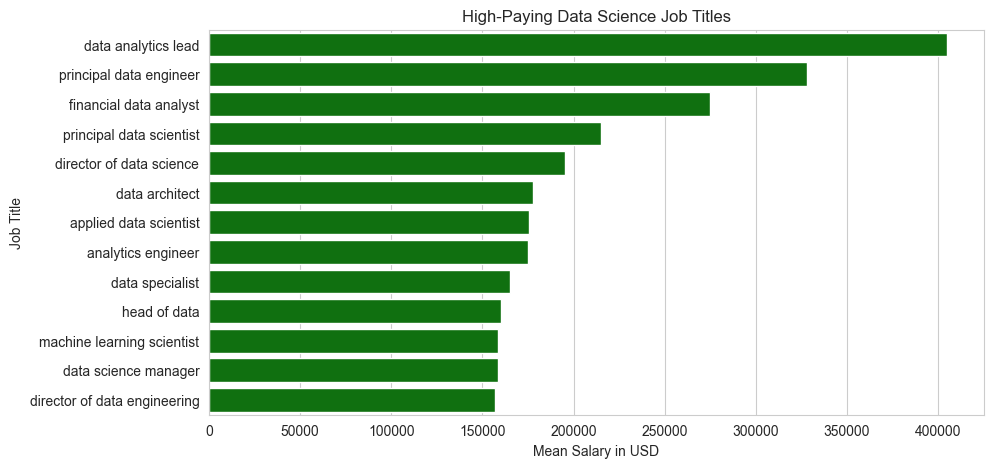

In [55]:
# Set plot size
plt.figure(figsize=(10, 5))

# Plot bar chart for high-paying job titles
sns.barplot(x='mean', y='job_title', data=high_paying_jobs, color='g')

# Set title and labels
plt.title('High-Paying Data Science Job Titles')
plt.xlabel('Mean Salary in USD')
plt.ylabel('Job Title')

plt.show()

This bar chart displays the mean salaries of high-paying data science job titles. These roles are associated with strategic leadership or specialized technical expertise. Understanding which job titles command higher salaries helps professionals target these roles for career growth and guides organizations in competitive compensation planning.

---

## **Part 2: Question 2 - How does company size affect the average salary of data scientists?**
**Explanation:**
To understand the impact of company size on salaries:

**Steps:**
Group the dataset by company_size.
Calculate the average, minimum, and maximum salaries for each company size category.
Visualize the findings to identify how salaries vary across small (S), medium (M), and large (L) companies.

In [56]:
# Group data by company size and calculate summary statistics for salaries
company_size_stats = df_cleaned.groupby('company_size')['salary_in_usd'].agg(['mean', 'min', 'max']).reset_index()

# Sort by mean salary for better visualization
company_size_stats_sorted = company_size_stats.sort_values(by='mean', ascending=False)

# Preview the result
company_size_stats_sorted

,company_size,mean,min,max
0,l,119242.994949,5882,600000
1,m,116905.466258,4000,450000
2,s,77632.674699,2859,416000


The table above shows the average (mean), minimum (min), and maximum (max) salaries for data scientists based on company size:

- Large (L): Highest average salary
- Medium (M): Slightly lower average than large companies
- Small (S): Significantly lower average than medium or large companies

Let's visualize these findings using a bar chart to understand the impact of company size on data science salaries. 

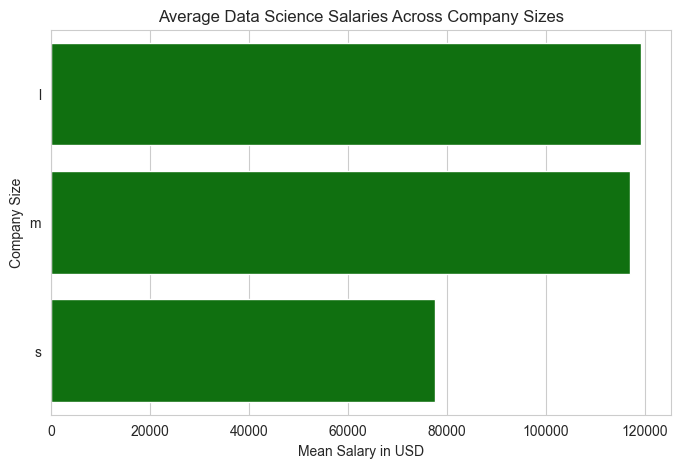

In [57]:
# Set plot size
plt.figure(figsize=(8, 5))

# Plot bar chart for mean salaries across company sizes
sns.barplot(x='mean', y='company_size', data=company_size_stats_sorted, color='g')

# Set title and labels
plt.title('Average Data Science Salaries Across Company Sizes')
plt.xlabel('Mean Salary in USD')
plt.ylabel('Company Size')

plt.show()

This bar chart shows the relationship between company size and average data science salaries:

- Large Companies (L): Offer the highest average salaries.
- Medium Companies (M): Offer salaries slightly below those of large companies.
- Small Companies (S): Provide significantly lower salaries on average.

This trend may reflect the varying resources and budgets of different company sizes, as well as the distinct demands and opportunities within each category. 

---

## **Part 2: Question 3 - What is the correlation between remote work ratios and salary levels?**
**Explanation:**
To understand the correlation between remote work and salary levels:

**Steps:**
- Group the data by remote_ratio to classify roles into fully remote (100%), hybrid (50%), or on-site (0%).
- Calculate the average, minimum, and maximum salaries for each remote work ratio.
- Visualize the relationship between remote work levels and average salaries.

In [58]:
# Group data by remote ratio and calculate summary statistics for salaries
remote_ratio_stats = df_cleaned.groupby('remote_ratio')['salary_in_usd'].agg(['mean', 'min', 'max']).reset_index()

# Sort by mean salary for better visualization
remote_ratio_stats_sorted = remote_ratio_stats.sort_values(by='mean', ascending=False)

# Preview the result
remote_ratio_stats_sorted

,remote_ratio,mean,min,max
2,100,122457.454068,4000,600000
0,0,106354.622047,2859,450000
1,50,80823.030303,5409,423000


The table above shows the average (mean), minimum (min), and maximum (max) salaries based on the level of remote work:

- 100% Remote: Fully remote positions offer the highest average salaries.
- 0% Remote: On-site positions provide slightly lower average salaries.
- 50% Remote: Hybrid positions offer the lowest average salaries.

I find it interesting that the highest salary within the dataset ($600,000) is that of a fully remote employee.

Let's visualize these trends using a bar chart to better understand the relationship between remote work and salaries.

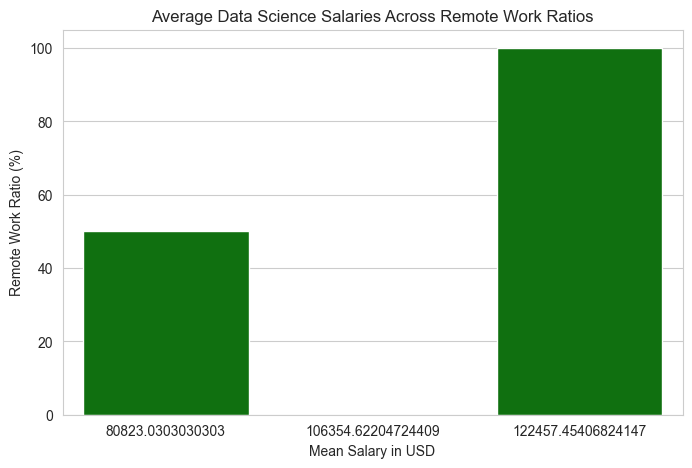

In [59]:
# Set plot size
plt.figure(figsize=(8, 5))

# Plot bar chart for mean salaries across remote work ratios
sns.barplot(x='mean', y='remote_ratio', data=remote_ratio_stats_sorted, color='g')

# Set title and labels
plt.title('Average Data Science Salaries Across Remote Work Ratios')
plt.xlabel('Mean Salary in USD')
plt.ylabel('Remote Work Ratio (%)')

plt.show()

This bar chart displays the relationship between remote work ratios and average salaries:

- 100% Remote: Fully remote positions have the highest average salaries, possibly due to the specialized nature or global hiring.
- 0% Remote: On-site roles offer moderately high salaries, likely due to the resources and benefits associated with on-site work.
- 50% Remote: Hybrid positions show the lowest average salaries, which might result from roles that don't fit neatly into either on-site or fully remote work categories.

Understanding these trends can help companies adjust their hiring strategies and allow professionals to better align their work preferences with salary expectations. 

## **Part 2 Question Summary**
- Question 1: High-paying data science roles are generally found in positions that require specialized skills or leadership capabilities, such as Data Analytics Lead, Principal Data Engineer, and Director of Data Science. These roles command higher salaries due to their strategic importance and the demand for experienced professionals with deep technical expertise.

- Question 2: Company size has a significant impact on average salaries, with large companies offering the highest salaries, followed by medium-sized companies. Small companies offer the lowest average salaries. This may be due to the resources available at larger companies and their ability to offer competitive salaries to attract top talent.

- Question 3: Fully remote roles are associated with the highest average salaries, while hybrid positions (50% remote) offer the lowest salaries. Fully remote work may attract a global workforce with specialized skills and offer higher compensation due to reduced location constraints. Further analysis could explore the specific job titles that thrive in remote work environments.

---

## **Part 3: Question 1 - Which countries offer the highest average salaries for data science roles?**
**Explanation:**
To identify the countries with the highest salaries

**Steps:**
- Group by Country: We grouped the dataset by the employee_residence column to categorize data scientists based on their country of residence.
- Calculate Salary Statistics: For each country, we calculated key salary statistics: the mean (average), minimum, and maximum salaries. This allows us to understand the central tendency and the range of salaries within each country.
- Sort by Average Salary: Sorting the countries by mean salary helps us identify those with the highest average salaries, offering insight into where data science roles are most lucrative.
- Visualize Distribution: Finally, by plotting the salary distribution using box plots, we reveal patterns, outliers, and the salary spread, helping us understand compensation disparities across countries.

In [61]:
# Group data by employee residence and calculate summary statistics for salaries
country_stats = df_cleaned.groupby('employee_residence')['salary_in_usd'].agg(['mean', 'min', 'max']).reset_index()

# Sort by mean salary for better visualization
country_stats_sorted = country_stats.sort_values(by='mean', ascending=False)

# Preview the result
country_stats_sorted.head()

,employee_residence,mean,min,max
38,my,200000.00000,200000,200000
45,pr,160000.00000,160000,160000
55,us,149194.11747,25000,600000
41,nz,125000.00000,125000,125000
9,ch,122346.00000,122346,122346


The table above lists the average (mean), minimum (min), and maximum (max) salaries for each country (employee residence), sorted by their mean salaries.

Noteworthy observations include:

- Top Countries: Malaysia, Puerto Rico, and the United States have the highest average salaries for data science roles.
- Lower Salaries: Countries like Ukraine, Kenya, and Iran have the lowest average salaries.

This variation reflects the economic differences across countries and regions.

Let's visualize the top-paying countries using a box plot.

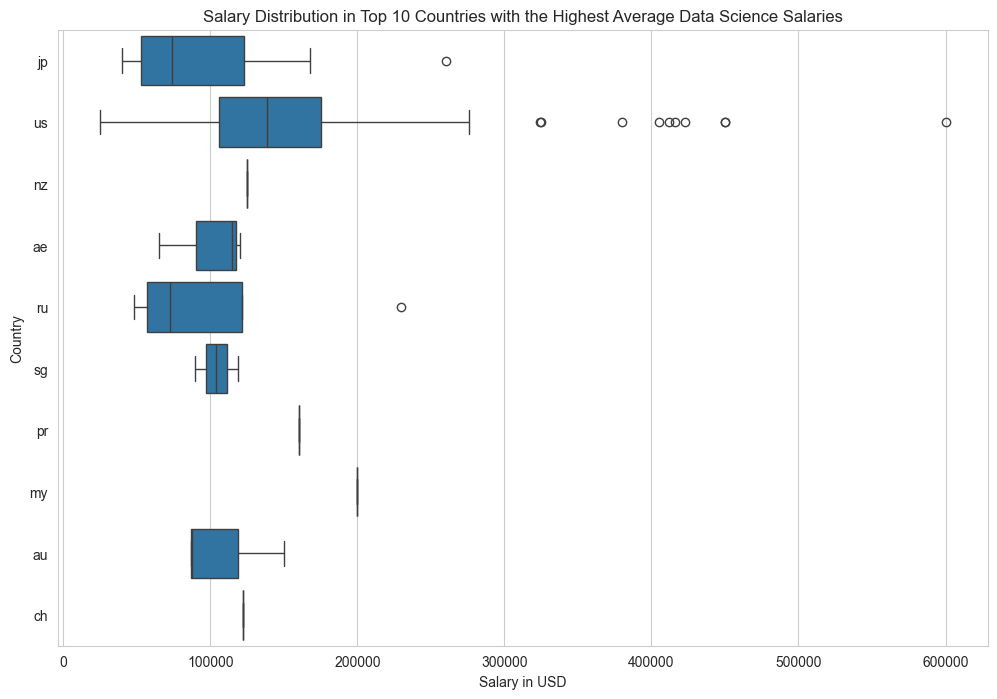

In [63]:
# Set plot size
plt.figure(figsize=(12, 8))

# Plot a box plot for the top 10 countries with the highest mean salaries
top_countries = country_stats_sorted.head(10)
sns.boxplot(x='salary_in_usd', y='employee_residence', data=df_cleaned[df_cleaned['employee_residence'].isin(top_countries['employee_residence'])])

# Set title and labels
plt.title('Salary Distribution in Top 10 Countries with the Highest Average Data Science Salaries')
plt.xlabel('Salary in USD')
plt.ylabel('Country')

plt.show()

This box plot visualizes the salary distribution within the top 10 countries for data science roles:

- The box represents the interquartile range (IQR), showing where the middle 50% of salaries lie.
- The horizontal line within each box marks the median salary.
- The whiskers extend to the minimum and maximum salaries within each country, revealing the overall range.

The United States shows a wide range of salaries, reflecting varying opportunities and levels of experience. Other countries, like Malaysia and Puerto Rico, have narrower ranges due to smaller data samples.

---

## **Part 3 - Question 2: What are the emerging trends in salaries and remote work across different regions?**
**Explanation:**
To understand the trends in salaries and remote work by region:

**Steps:**
- Classify Regions: Group the dataset by regions based on the employee_residence column.
- Calculate Salary and Remote Work Ratios: Aggregate data to calculate the average salary and remote work ratios per - region.
- Visualize with a Grouped Bar Chart: A grouped bar chart is a clear way to compare the two metrics side by side for each region.

In [64]:
# Define region groupings
regions = {
    'North America': ['us', 'ca', 'mx'],
    'Europe': ['gb', 'de', 'fr', 'es', 'it', 'nl', 'be', 'pl', 'se', 'dk', 'fi', 'no'],
    'Asia': ['in', 'jp', 'cn', 'sg', 'hk', 'vn', 'kr', 'my'],
    'Latin America': ['br', 'ar', 'cl', 'co', 'pe', 'bo', 'hn'],
    'Africa': ['ng', 'eg', 'za', 'dz', 'ke', 'gh'],
    'Middle East': ['ae', 'sa', 'iq', 'il', 'ir', 'tr']
}

# Add a region column to the dataset
def map_to_region(country):
    for region, countries in regions.items():
        if country in countries:
            return region
    return 'Other'

df_cleaned['region'] = df_cleaned['employee_residence'].apply(map_to_region)

# Group data by region and calculate average salary and remote ratio
region_stats = df_cleaned.groupby('region').agg(mean_salary=('salary_in_usd', 'mean'), mean_remote_ratio=('remote_ratio', 'mean')).reset_index()

# Preview the result
region_stats

,region,mean_salary,mean_remote_ratio
0,Africa,42318.000000,87.500000
1,Asia,54545.333333,61.111111
2,Europe,72976.546218,59.243697
3,Latin America,49517.272727,68.181818
4,Middle East,58036.250000,62.500000
5,North America,144309.341598,76.721763
6,Other,60763.421053,66.666667


The table shows the mean salaries and average remote work ratios across different global regions:

- North America: Highest average salaries (around $144k) and relatively high remote work ratio (~76%).
- Europe: Moderate salaries (~$73k) and a slightly lower remote work ratio (~59%).
- Asia and the Middle East: Both have moderate salaries and remote work ratios between 60-62%.
- Africa: Lower average salaries (~$42k) but the highest remote work ratio (~87%).

Let's visualize this data using a bargraph to show trends across regions for both salary and remote work. 

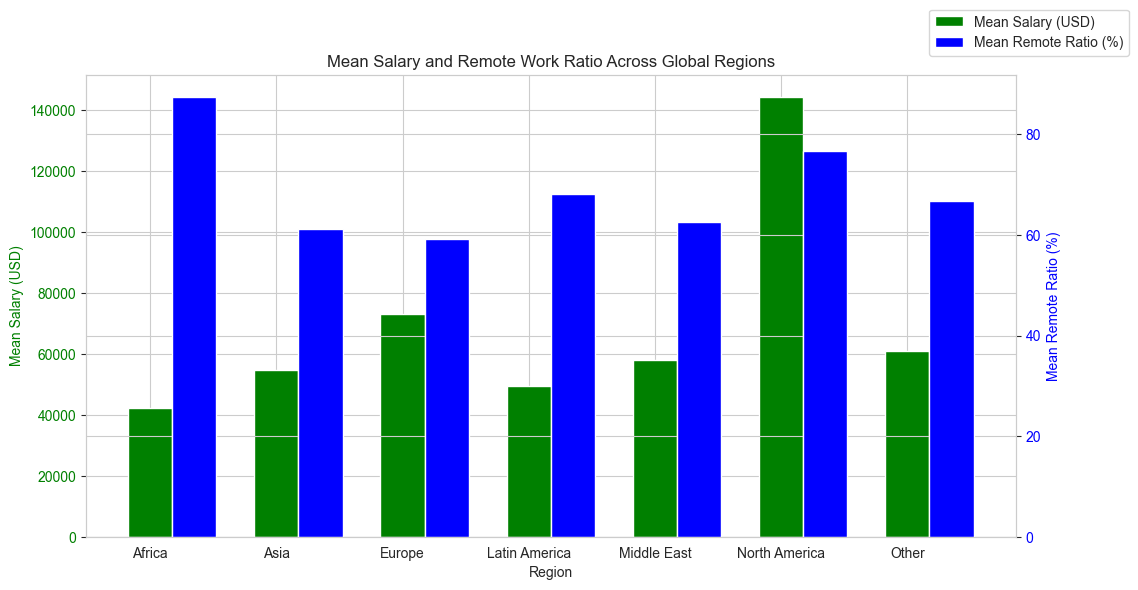

In [68]:
# Set plot size
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar width and x locations
bar_width = 0.35
r1 = range(len(region_stats))

# Plot the mean salaries
ax1.bar(r1, region_stats['mean_salary'], width=bar_width, label='Mean Salary (USD)', color='g')
ax1.set_xlabel('Region')
ax1.set_ylabel('Mean Salary (USD)', color='g')
ax1.tick_params(axis='y', labelcolor='g')
ax1.set_xticks(r1)
ax1.set_xticklabels(region_stats['region'])
ax1.set_title('Mean Salary and Remote Work Ratio Across Global Regions')

# Create a secondary y-axis for the remote work ratio
ax2 = ax1.twinx()
ax2.bar([x + bar_width for x in r1], region_stats['mean_remote_ratio'], width=bar_width, label='Mean Remote Ratio (%)', color='b')
ax2.set_ylabel('Mean Remote Ratio (%)', color='b')
ax2.tick_params(axis='y', labelcolor='b')

# Add legends
fig.legend(loc='upper right', bbox_to_anchor=(1, 1))

plt.show()


This chart provides a clearer comparison between average salaries and remote work ratios:

- Mean Salary (Green Bars): Reflects compensation levels across regions.
- Mean Remote Ratio (Blue Bars, Secondary Y-Axis): Illustrates the proportion of remote work.

Key insights include:

- North America: High salaries and a relatively high remote work ratio.
- Europe: Moderate salaries and a slightly lower proportion of remote work.
- Asia and Middle East: Similar salaries with varying remote work ratios.
- Africa: Highest remote work ratio despite lower salaries.

The secondary y-axis helps present both metrics distinctly, offering insights into regional trends.

---

## **Part 3: Question 3 - How do company locations and employee residences impact salary?**
**Explanation:**
To analyze the impact of company location and employee residence on salaries:

**Steps:**
- Group by Company Location and Employee Residence: Compare salary averages between where the company is based (company_location) and where the employee resides (employee_residence).
- Visualize Impact: Show the correlation using a scatter plot that displays each location's effect on salary.

In [69]:
# Group by both company location and employee residence to calculate mean salaries
location_stats = df_cleaned.groupby(['company_location', 'employee_residence']).agg(mean_salary=('salary_in_usd', 'mean')).reset_index()

# Preview the grouped data
location_stats

,company_location,employee_residence,mean_salary
0,ae,ae,100000.000000
1,as,in,18053.000000
2,at,at,76738.666667
3,at,de,61467.000000
4,au,au,108042.666667
...,...,...,...
85,us,ro,26005.000000
86,us,ru,54000.000000
87,us,us,148955.900000
88,us,vn,38400.000000


The table shows average salaries grouped by both company location and employee residence. This helps uncover patterns and relationships between where companies are based and where their employees live.

Let's visualize this using a scatter plot to understand how different combinations of company location and employee residence impact salary.

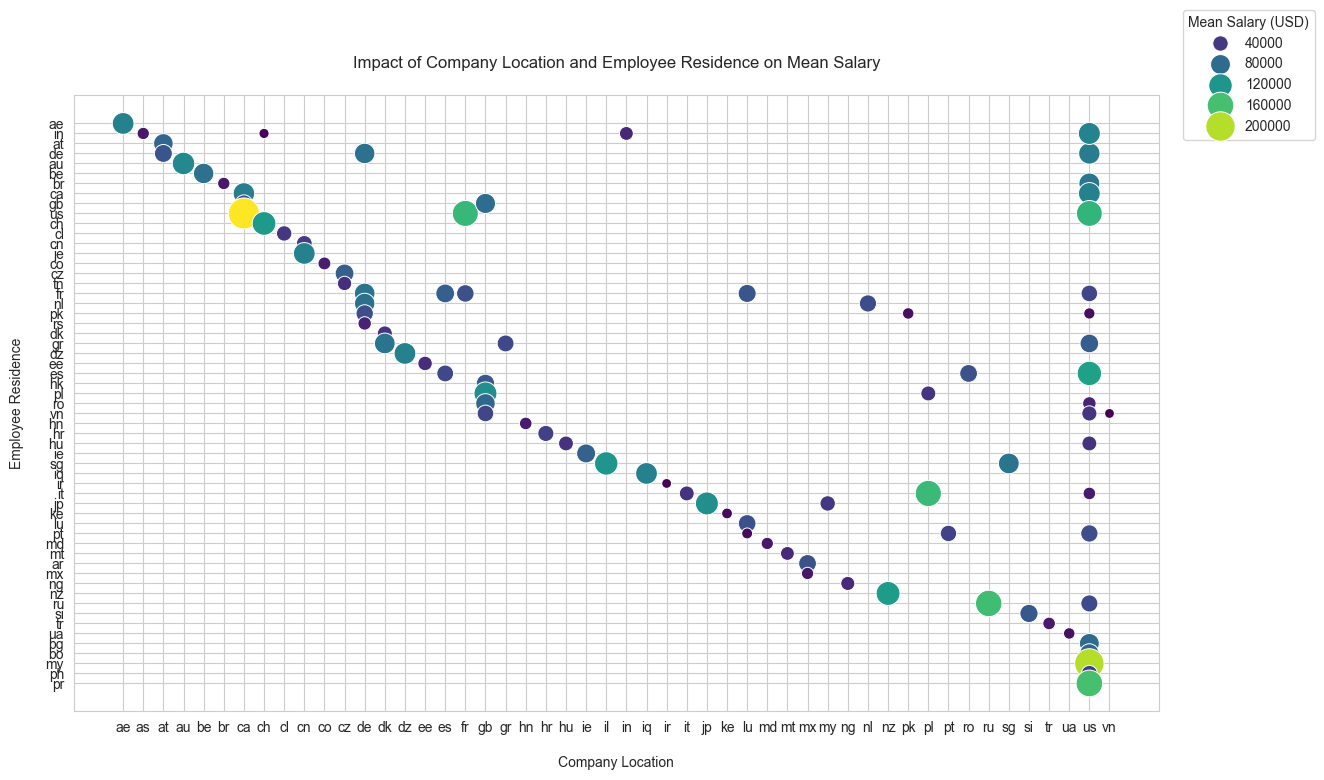

In [70]:
# Set plot size with adjusted spacing
plt.figure(figsize=(14, 8))

# Create a scatter plot for mean salaries with adjusted spacing
sns.scatterplot(x='company_location', y='employee_residence', size='mean_salary', sizes=(50, 500), hue='mean_salary', data=location_stats, palette='viridis')

# Set title and labels with added spacing
plt.title('Impact of Company Location and Employee Residence on Mean Salary', pad=20)
plt.xlabel('Company Location', labelpad=15)
plt.ylabel('Employee Residence', labelpad=15)

# Add legend
plt.legend(title='Mean Salary (USD)', loc='upper right', bbox_to_anchor=(1.15, 1.15))

plt.show()

This scatter plot illustrates how company location and employee residence impact salaries:

The size of each marker represents the mean salary, while the color intensity also indicates salary levels.

- US-based Companies: Generally offer higher salaries, particularly to employees based in the U.S.
- Cross-border Employment: Employees residing outside the company’s location often have varied salary levels, possibly due to local living costs or work regulations.

Overall, this visualization reveals trends in global data science hiring practices and the salary implications for companies and employees across regions.

## **Part 3 Question Summary**
- Question 1: North America leads in average salaries, while other regions, such as Africa and Latin America, have significantly lower average salaries. However, Africa has the highest remote work ratio, reflecting potential cost savings or regional employment structures.

- Question 2: The grouped bar chart demonstrates that North America has the highest mean salaries and a relatively high remote work ratio. Africa offers the highest remote work ratio but the lowest salaries. This comparison helps companies tailor their hiring practices and employees set realistic salary expectations.

- Question 3: The scatter plot shows that U.S.-based companies generally offer higher salaries, especially to U.S. residents. Cross-border salary variations highlight the complexities of global hiring and emphasize the importance of local cost of living, economic strength, and labor regulations.

---

### Conclusions

The primary goal of the research was to explore three parts:

**Part One: General Exploration**

In Part One, we explored general trends in data science salaries. Over the past three years, salaries have shown a steady upward trend, indicating growing demand for specialized skills. The distribution of salaries varied significantly across job titles, with specialized roles like Principal Data Engineer and Data Analytics Lead commanding the highest compensation. Moreover, experience level significantly impacts salaries, with executive and senior roles offering the highest average pay.

**Part Two: Identifying Characteristics of High-Paying Data Science Roles**

In this part, we examined the properties associated with high-paying data science roles. We discovered that these roles are often senior or specialized, like Director of Data Science and Principal Data Scientist. Company size also plays a significant role, as larger companies typically offer higher salaries. Additionally, fully remote work is linked to higher salaries compared to hybrid and on-site arrangements.

**Part Three: Regional Trends in Data Science Compensation**

In Part Three, we investigated global trends. North America offers the highest salaries, while Africa and Latin America provide significantly lower compensation but maintain high remote work ratios. Furthermore, U.S. companies generally offer high salaries, especially to U.S.-based employees. Cross-border employment introduces significant variations due to factors like economic strength and local labor regulations.

### Summary

This research provides valuable insights into data science salary trends and their influencing factors. We discovered patterns in compensation based on job title, experience level, company size, region, and remote work practices. While limitations exist, the dataset offers a strong foundation for further exploration into the evolving landscape of data science careers.

---

### Limitations

1. **Sample Size and Representation**: Although the dataset includes various global regions, the representation may not fully capture the diversity of data science roles worldwide. Some regions have fewer data points, which could skew average salary values and make comparisons less reliable.

2. **Job Title Ambiguity**: The dataset uses a variety of job titles, many of which may overlap in responsibilities. This lack of standardization can lead to inconsistencies when comparing salaries across roles.

3. **Currency Conversion**: Salary data is converted into USD, but currency fluctuations can impact comparisons, especially for salaries sourced from regions with high inflation or unstable currencies.

4. **Industry and Company Factors**: The dataset does not explicitly account for the industry or specific company factors that can influence salaries, such as sector demand, company profitability, or growth phase.

5. **Self-Reported Data**: Some data points may have inaccuracies due to self-reporting, leading to potential bias in reported salaries or experience levels.

6. **Evolving Market Conditions**: The dataset only covers salaries from recent years. Market conditions and the rapid evolution of the data science field may limit the applicability of these findings for long-term forecasting.

Further research should incorporate additional datasets and address these limitations to provide a more comprehensive view of global data science compensation.